# **Convolutional Neural Networks Project: Street View Housing Number Digit Recognition**


Welcome to my project on image classification comparing Convolution Neural Networks, using Tensorflow. 

--------------
## **Context** 
--------------

The main objective of the project was to develop a system that could accurately recognize and extract house numbers from images. To achieve this, we compared the latest techniques in computer vision and deep learning to create a robust and scalable solution. The system was trained on a large dataset of images, containing a diverse range of house numbers in different conditions and environments.


----------------
## **Objective**
----------------

Building a CNN model that can recognize digits in the house number images.

-------------
## **Dataset**
-------------
A subset of the SVHN house number dataset. The dataset is available on Kaggle: https://www.kaggle.com/datasets/stanfordu/street-view-house-numbers

## **Mount the drive**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, LeakyReLU #fixed typo, MaxPool2D -> MaxPooling2D

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

**checking the version of tensorflow.**

In [ ]:
print(tf.__version__)

2.9.2


## **Load the dataset**

- Load the dataset, a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
import h5py

# Open the file as read only
# User can make changes in the path as required

h5f = h5py.File('/content/drive/MyDrive/DL project/SVHN_single_grey1.h5', 'r')

# Load the the train and the test dataset

X_train = h5f['X_train'][:]        

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

## **Visualizing images**


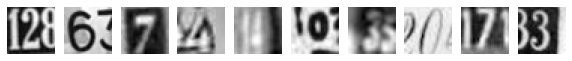

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Visualizing the first 10 images in the dataset and printing their labels

%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)
    
    plt.imshow(X_train[i], cmap = "gray")  # Write the function to visualize images

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshaping the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)



In [ ]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train /255.0

X_test = X_test /255.0

In [ ]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


In [ ]:
# Write the function and appropriate variable name to one-hot encode the output

y_train = tf.keras.utils.to_categorical(y_train)

y_test = tf.keras.utils.to_categorical(y_test)

# test labels

y_test       
#y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
# Define the model

def cnn_model_1():

    model = Sequential() 
    
    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 1))) #first Convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding

    model.add(LeakyReLU(0.1))     #LeakyReLu layer, slope equal to 0.1

    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))   # second Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding

    model.add(LeakyReLU(0.1)) # LeakyRelu with the slope equal to 0.1

    model.add(MaxPooling2D(pool_size = (2, 2))) #max-pooling layer with a pool size of 2x2

    model.add(Flatten()) #Flatten the output from the previous layer

    model.add(Dense(32)) #dense layer with 32 nodes

    model.add(LeakyReLU(0.1)) #LeakyRelu layer with the slope equal to 0.1

    model.add(Dense(10, activation = 'softmax')) #final output layer with nodes equal to the number of classes, i.e., 10 and 'softmax' as the activation function
    
    # Compile the model

    model.compile(loss = 'categorical_crossentropy',
    
    # Using Adam optimizer with learning rate 0.001
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),  
  

    metrics=['accuracy'])   
    
    return model #without fitting

In [ ]:
# Build the model, storing output in new variable

model_1 = cnn_model_1()

In [ ]:
# Print the model summary

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

In [ ]:
# Fit the model on the training data with a validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20. Store the model building history to use later for visualization.

history_model_1 = model_1.fit(X_train, y_train,
            
            validation_split = 0.2,

            batch_size = 32,
            
            verbose = 1,

            epochs = 20,
)

Epoch 1/20
1050/1050 [==============================] - 12s 4ms/step - loss: 1.2162 - accuracy: 0.5979 - val_loss: 0.6508 - val_accuracy: 0.8101
Epoch 2/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.5383 - accuracy: 0.8446 - val_loss: 0.5124 - val_accuracy: 0.8540
Epoch 3/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.4411 - accuracy: 0.8679 - val_loss: 0.4892 - val_accuracy: 0.8617
Epoch 4/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3800 - accuracy: 0.8887 - val_loss: 0.4497 - val_accuracy: 0.8737
Epoch 5/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3351 - accuracy: 0.8973 - val_loss: 0.4694 - val_accuracy: 0.8681
Epoch 6/20
1050/1050 [==============================] - 6s 5ms/step - loss: 0.2972 - accuracy: 0.9106 - val_loss: 0.4599 - val_accuracy: 0.8726
Epoch 7/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2664 - accuracy: 0.9178 - val_loss: 0.4491 - val_accuracy

### **Plotting the validation and training accuracies**

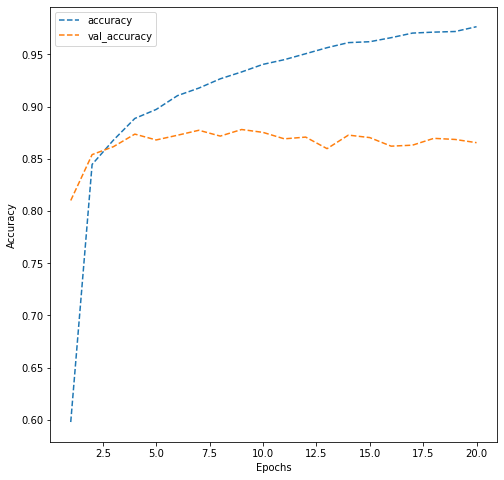

In [ ]:
# Plotting the accuracies

dict_hist = history_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:** 

*   Based on the graph and the model_fit printout, the validation accuracy hovers between 0.87 & 0.86.
*   The training accuracy steadily improves, but the major disparity demonstrates a generally poor model.
*   The validation accuracy being so much lower than the training data suggests overfitting.





  



Building another model to see if we can get a better model with generalized performance.


In [ ]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
# Define the model

def cnn_model_2():
    
    model = Sequential()
    
    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 1))) #first Convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding and provide the input shape = (32, 32, 1)

    model.add(LeakyReLU(0.1))  #a LeakyRelu layer with the slope equal to 0.1

    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))   #Second Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
    
    model.add(LeakyReLU(0.1)) #LeakyRelu with the slope equal to 0.1

    model.add(MaxPooling2D(pool_size = (2, 2))) #max-pooling layer with a pool size of 2x2

    model.add(BatchNormalization()) #a BatchNormalization layer

    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))  #Third Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding

    model.add(LeakyReLU(0.1)) #a LeakyRelu layer with the slope equal to 0.1

    model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))  #Fourth Convolutional layer 64 filters and the kernel size of 3x3 with 'same' padding

    model.add(LeakyReLU(0.1)) #LeakyRelu layer with the slope equal to 0.1

    model.add(MaxPooling2D(pool_size = (2, 2))) #max-pooling layer with a pool size of 2x2

    model.add(BatchNormalization()) #BatchNormalization layer

    model.add(Flatten()) #Flatten the output from the previous layer

    model.add(Dense(32)) #dense layer with 32 nodes

    model.add(LeakyReLU(0.1))  #LeakyRelu layer with the slope equal to 0.1

    model.add(Dropout(0.5)) #dropout layer with the rate equal to 0.5

    model.add(Dense(10, activation = 'softmax')) #the final output layer with nodes equal to the number of classes, i.e., 10 and 'softmax' as the activation function

    # Compile the model

    model.compile(loss = 'categorical_crossentropy',   
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics=['accuracy'])   #Compile the model with the categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'.
      #was 'adamax' removed and put adam
  
    return model

In [ ]:
# Build the model

model_2 = cnn_model_2()

In [ ]:
# Print the summary

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [ ]:
# Fit the model on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30. Store the model building history to use later for visualization.

history_model_2 = model_2.fit(X_train, y_train,
            
            validation_split = 0.2,

            batch_size = 128,
            
            verbose = 1,

            epochs = 30,
)

Epoch 1/30
263/263 [==============================] - 4s 11ms/step - loss: 1.4594 - accuracy: 0.5021 - val_loss: 2.8997 - val_accuracy: 0.1329
Epoch 2/30
263/263 [==============================] - 2s 9ms/step - loss: 0.7008 - accuracy: 0.7826 - val_loss: 0.7336 - val_accuracy: 0.7721
Epoch 3/30
263/263 [==============================] - 2s 9ms/step - loss: 0.5597 - accuracy: 0.8285 - val_loss: 0.4459 - val_accuracy: 0.8746
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 0.4972 - accuracy: 0.8469 - val_loss: 0.4365 - val_accuracy: 0.8774
Epoch 5/30
263/263 [==============================] - 3s 10ms/step - loss: 0.4510 - accuracy: 0.8624 - val_loss: 0.4096 - val_accuracy: 0.8894
Epoch 6/30
263/263 [==============================] - 3s 10ms/step - loss: 0.4118 - accuracy: 0.8733 - val_loss: 0.4522 - val_accuracy: 0.8649
Epoch 7/30
263/263 [==============================] - 2s 9ms/step - loss: 0.3825 - accuracy: 0.8832 - val_loss: 0.4237 - val_accuracy: 0.8758
Ep

### **Plotting the validation and training accuracies**

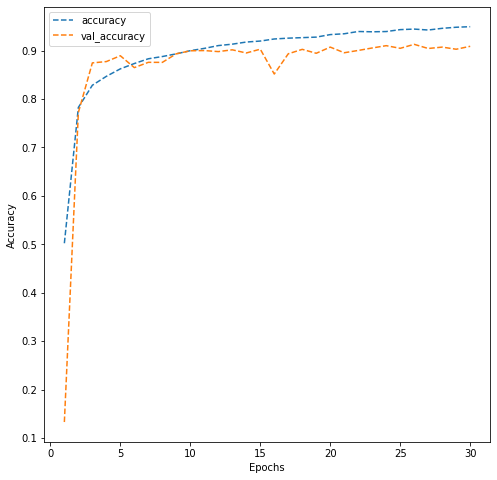

In [ ]:
# Plotting the accuracies

dict_hist = history_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:** 


*   Both Normalization and Drop out added to the model.
*   Slight underfitting of validation test at first, but after 12 or so epochs, it stops, and training accuracy increases at a steady rate. 
*   Validation accuracy does not maintain the same improvement. 
*   There is still overfitting in the validation data, but it is overall better than the first model.





In [ ]:
# Make prediction on the test data using model_2 

test_pred = model_2.predict(X_test)


test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 1s 2ms/step


In [ ]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1814
           1       0.88      0.92      0.90      1828
           2       0.95      0.91      0.93      1803
           3       0.90      0.86      0.88      1719
           4       0.93      0.93      0.93      1812
           5       0.90      0.91      0.90      1768
           6       0.88      0.90      0.89      1832
           7       0.95      0.89      0.92      1808
           8       0.88      0.89      0.89      1812
           9       0.89      0.91      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



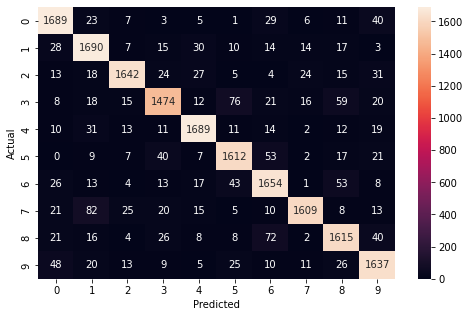

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:**


*   The model is giving 0.90 percent accuracy. Not bad, but definitely would prefer to improve it in the future. 
*   More drop out is an option for improvement, as well as data augmentation
*   There seems to be the most confusion with zeros and other numbers. Other general confusion results between various numbers with curves, and similarly, between numbers with straight lines as their shape.  


 